## Demo for example 11.1.3

In [1]:
# Taken from https://stackoverflow.com/a/37366154/12484699, edited

import numpy as np
from matplotlib import pyplot
from math import cos, sin, atan, e


class _Sigmoid:
    symbol='σ'
    def __call__(self, x):
        return 1/(1+e**(-x))

class _Input:
    symbol='Inp'
    def __call__(self, x):
        return x

Sigmoid = _Sigmoid()
Input = _Input()

        
class Neuron():
    def __init__(self, xy, weights, bias, activation=Input):
        self.weights = weights
        self.bias = bias
        self.activation = activation
        self.xy = xy

    def draw(self, neuron_radius):
        circle = pyplot.Circle(self.xy, radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)
        pyplot.gca().annotate(self.activation.symbol, self.xy, color='black', ha='center')

    def comp(self, inputs):
        return self.activation(np.dot(self.weights, inputs) - self.bias)

    def draw_comp(self, neuron_radius, inputs):
        value = self.comp(inputs)
        circle = pyplot.Circle(self.xy, radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)
        pyplot.gca().annotate(str(round(value[0], 4)), self.xy, color='black', ha='center')
        return value


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer,
                 weights, biases, activation=Input):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 4
        self.neuron_radius = 1.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons, weights, biases, activation=activation)
        self.biases = biases

    def __intialise_neurons(self, number_of_neurons, weights, biases, activation=Input):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for weight, bias in zip(weights, biases):
            neuron = Neuron((x, self.y), weight, bias, activation=activation)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.xy[0] - neuron1.xy[0]) / float(neuron2.xy[1] - neuron1.xy[1]))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.xy[0] - x_adjustment, neuron2.xy[0] + x_adjustment), (neuron1.xy[1] - y_adjustment, neuron2.xy[1] + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)

    def draw_comp(self, inputs, layerType=0):
        output = np.zeros(self.biases.shape)
        for i, neuron in enumerate(self.neurons):
            output[i] = neuron.draw_comp( self.neuron_radius, inputs )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        return output


class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons, weights, biases, activation=Input):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer,
                      weights, biases, activation=activation)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

    def draw_comp(self, inputs):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            inputs = layer.draw_comp( inputs, i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network computation', fontsize=15 )
        pyplot.show()

In [2]:
network = NeuralNetwork( 3 )

network.add_layer(3,
                  np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]),
                  np.array([[0], [0], [0]]),
                  activation=Input
                 )
network.add_layer(3,
                  np.array([[0, 10, -10], [-10, 0, 10], [10, -10, 0]]),
                  np.array([[5], [5], [5]]),
                  activation=Sigmoid
                 )

network.add_layer(1,
                  np.array([[10, 10, 10]]),
                  np.array([[5]]),
                  activation=Sigmoid
                 )

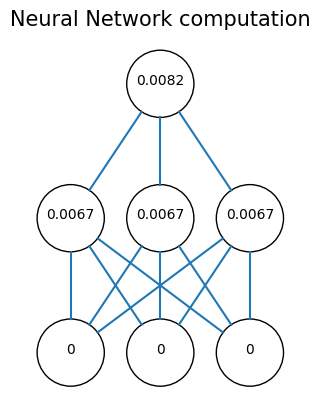

In [3]:
network.draw_comp(
    np.array([[0],[0],[0]])
)

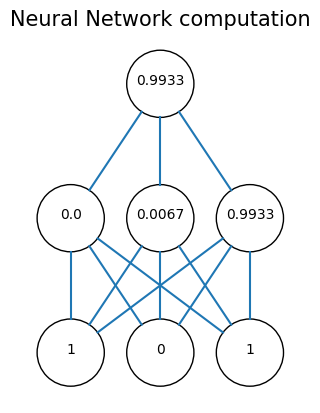

In [4]:
network.draw_comp(
    np.array([[1],[0],[1]])
)

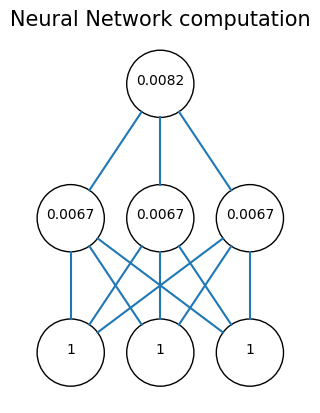

In [5]:
network.draw_comp(
    np.array([[1],[1],[1]])
)

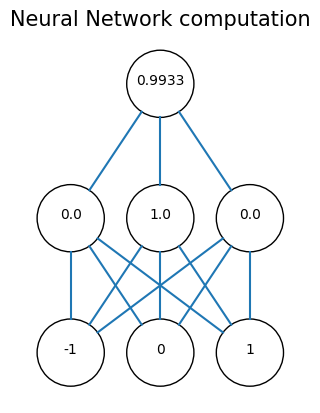

In [6]:
network.draw_comp(
    np.array([[-1],[0],[1]])
)

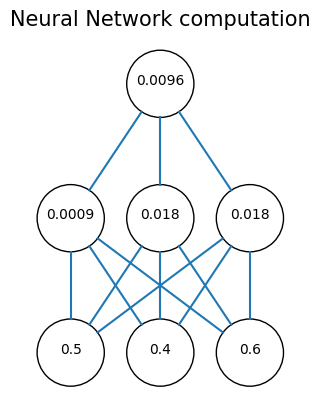

In [7]:
network.draw_comp(
    np.array([[0.5],[0.4],[0.6]])
)